In [ ]:
!pip install gensim scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
fakeData = pd.read_csv('Fake.csv')
trueData = pd.read_csv('True.csv')

In [ ]:
fakeData.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
trueData.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
# Assigning labels

'''
True News - 1
Fakde News - 0

'''
trueData['label'] = 1
fakeData['label'] = 0

In [ ]:
# combining two dataframes
combinedData = pd.concat([trueData, fakeData], axis=0)

#### Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

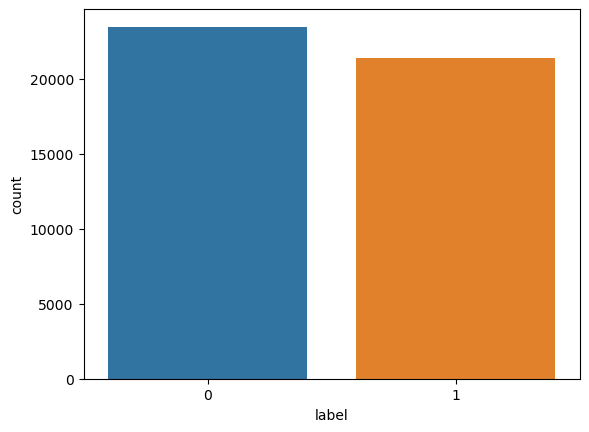

In [ ]:
sns.countplot(x=combinedData['label'] ,data=combinedData)

<Axes: xlabel='subject'>

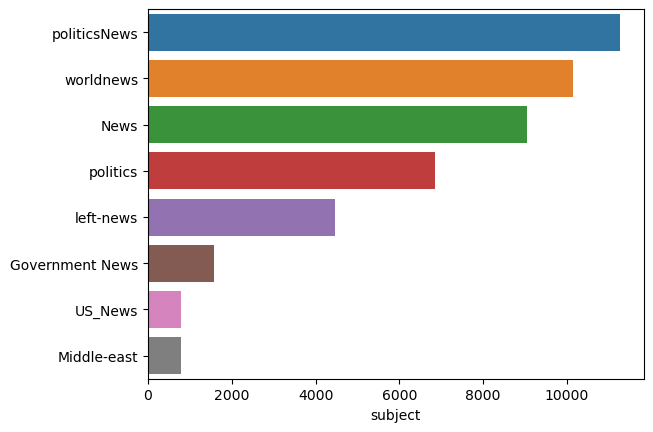

In [ ]:
sns.barplot(y=combinedData['subject'].value_counts().index,x=combinedData['subject'].value_counts(),
            orient='h')

In [ ]:
combinedData = combinedData[['text','label']]

In [ ]:
combinedData.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


#### Text Pre Processing Steps

In [ ]:
def clean_text(text):
    """
    Cleans the input text by performing several operations:
    - Converts text to lowercase.
    - Removes text within square brackets.
    - Eliminates URLs.
    - Removes punctuation.
    - Removes words containing numbers.
    - Strips extra whitespace.

    """
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\s{2,}', ' ', text)
    return text

def remove_stopwords(text):
    """
    Removes English stopwords from a list of words.
    """
    stop_words = set(stopwords.words('english'))  # Get English stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [ ]:
combinedData['Cleanedtext'] = combinedData['text'].apply(lambda x:clean_text(x))
combinedData['Cleanedtext'] = combinedData['Cleanedtext'].apply(lambda x:remove_stopwords(x))

In [ ]:
combinedData.head()

,text,label,Cleanedtext
0,WASHINGTON (Reuters) - The head of a conservat...,1,washington reuters head conservative republica...
1,WASHINGTON (Reuters) - Transgender people will...,1,washington reuters transgender people allowed ...
2,WASHINGTON (Reuters) - The special counsel inv...,1,washington reuters special counsel investigati...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1,washington reuters trump campaign adviser geor...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,seattlewashington reuters president donald tru...


#### for all sentences

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pardhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


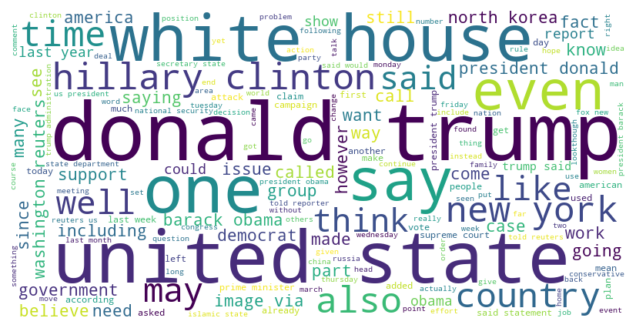

In [ ]:
# Create the word cloud object, set configurations
import nltk
from nltk.corpus import stopwords as nltk_stopwords
nltk.download('stopwords')

wordcloud = WordCloud(width = 800, height = 400,
                      background_color ='white',
                      stopwords = set(nltk_stopwords.words('english')),
                      min_font_size = 10).generate(" ".join(combinedData['Cleanedtext']))


plt.figure(figsize = (8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### for all True Sentences

In [ ]:
# Create the word cloud object, set configurations
import nltk
from nltk.corpus import stopwords as nltk_stopwords
nltk.download('stopwords')

wordcloud = WordCloud(width = 800, height = 400,
                      background_color ='white',
                      stopwords = set(nltk_stopwords.words('english')),
                      min_font_size = 10).generate(" ".join(combinedData[combinedData['label'] == 1]['Cleanedtext']))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pardhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


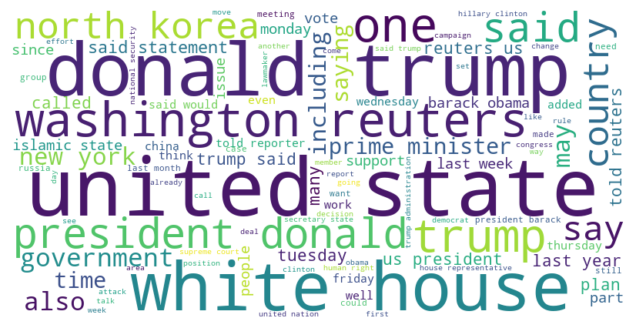

In [ ]:
plt.figure(figsize = (8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### for all False Sentences

In [ ]:
# Create the word cloud object, set configurations
import nltk
from nltk.corpus import stopwords as nltk_stopwords
nltk.download('stopwords')

wordcloud = WordCloud(width = 800, height = 400,
                      background_color ='white',
                      stopwords = set(nltk_stopwords.words('english')),
                      min_font_size = 10).generate(" ".join(combinedData[combinedData['label'] == 0]['Cleanedtext']))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pardhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


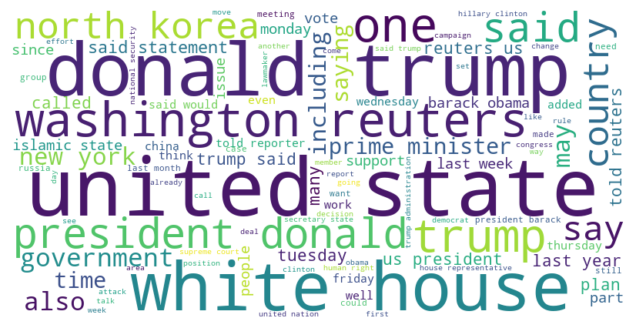

In [ ]:
plt.figure(figsize = (8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Model Building

In [ ]:
# Spliting Data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(combinedData['Cleanedtext'],
                                                    combinedData['label'], test_size=0.2, stratify=combinedData['label'], random_state=38)

#### Count Vectorizer with Logistic Regression

In [ ]:
pipelineCountVector = Pipeline([('countVector', CountVectorizer()),
                ('logisticRegressio', LogisticRegression())])

In [ ]:
pipelineCountVector.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countVector', CountVectorizer()),
                ('logisticRegressio', LogisticRegression())])

In [ ]:
preds = pipelineCountVector.predict(X_test)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



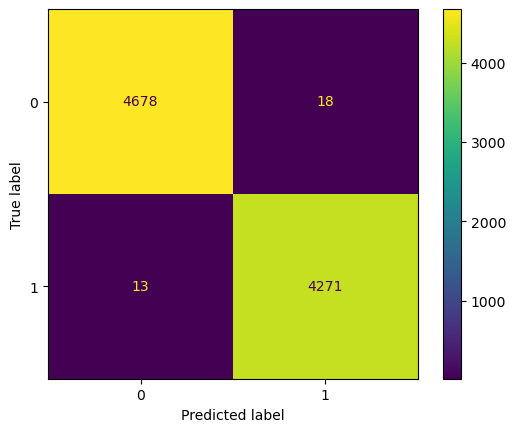

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipelineCountVector, X_test, y_test)

#### TF-IDF with Logistic Regression

In [ ]:
pipelineTFIDF = Pipeline([('tfidf', TfidfVectorizer()),
                ('logisticRegressio', LogisticRegression())])

In [ ]:
pipelineTFIDF.fit(X_train, y_train)

Pipeline(steps=[('countVector', TfidfVectorizer()),
                ('logisticRegressio', LogisticRegression())])

In [ ]:
preds = pipelineTFIDF.predict(X_test)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



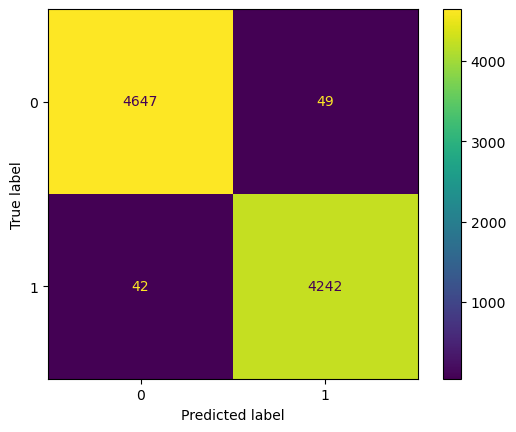

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipelineTFIDF, X_test, y_test)

#### Word2Vec with Logistic Regression

In [ ]:
class WordVecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=100, window=5, min_count=1, workers=4):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.workers = workers
        self.model = None

    def fit(self, X, y=None):
        """
        Train the Word2Vec model on the provided list of tokenized sentences.
        """
        self.model = Word2Vec(sentences=X, vector_size=self.vector_size, window=self.window, min_count=self.min_count, workers=self.workers)
        return self

    def transform(self, X):
        """
        Transform the input text to the corresponding Word2Vec vector.
        """
        return np.array([
            np.mean([self.model.wv[word] for word in words if word in self.model.wv] or [np.zeros(self.vector_size)], axis=0)
            for words in X
        ])

In [ ]:
pipelineWord2Vec = Pipeline([
    ('word2vec_vectorizer', WordVecVectorizer()),
    ('logistic_regression', LogisticRegression())
])


In [ ]:
pipelineWord2Vec.fit(X_train, y_train)

Pipeline(steps=[('word2vec_vectorizer', WordVecVectorizer()),
                ('logistic_regression', LogisticRegression())])

In [ ]:
preds = pipelineWord2Vec.predict(X_test)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4696
           1       0.95      0.98      0.97      4284

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



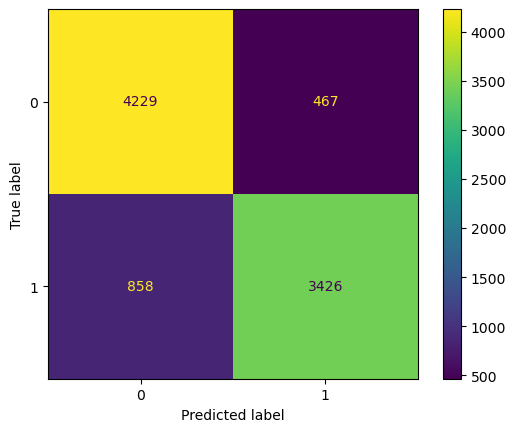

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipelineWord2Vec, X_test, y_test)

#### Count Vectorizer with Niave Bayes Classifier

In [ ]:
pipelineCountVectorBayes = Pipeline([('countVector', CountVectorizer()),
                ('logisticRegressio', MultinomialNB())])

pipelineCountVector.fit(X_train, y_train)

preds = pipelineCountVector.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



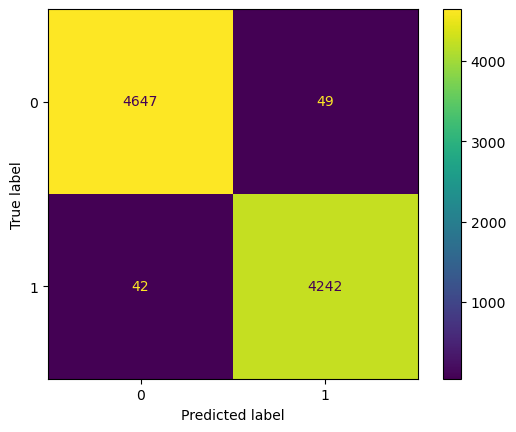

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipelineTFIDF, X_test, y_test)

#### TF-IDF with Niave Bayes Classifier

In [ ]:
pipelineCountVectorTF_IDF = Pipeline([('countVector', TfidfVectorizer()),
                ('logisticRegressio', MultinomialNB())])

pipelineCountVectorTF_IDF.fit(X_train, y_train)

preds = pipelineCountVectorTF_IDF.predict(X_test)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      4696
           1       0.94      0.97      0.95      4284

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



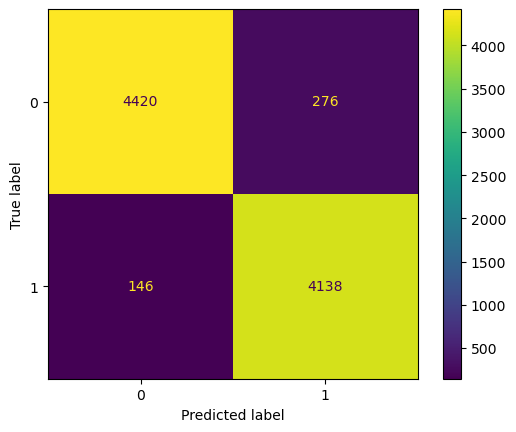

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipelineCountVectorTF_IDF, X_test, y_test)

#### TF-IDF with Logistic Regression Classifier

In [ ]:
pipelineCount_vector = Pipeline([('countVector', CountVectorizer()),
                ('Niave Bays', MultinomialNB())])

pipelineCount_vector.fit(X_train, y_train)

preds = pipelineCount_vector.predict(X_test)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4696
           1       0.95      0.98      0.97      4284

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



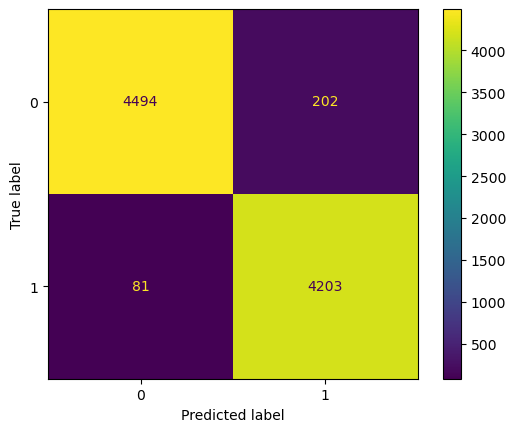

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipelineCount_vector, X_test, y_test)